In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
import matplotlib.patches as patches

The environment we used:

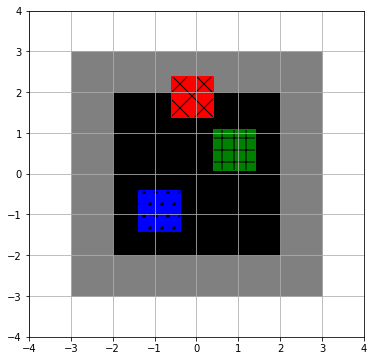

In [27]:
fig = plt.figure( figsize=(6,6) )
ax = fig.add_subplot(111)

ax.add_patch(
    patches.Rectangle(
        (-3, -3),
        6,
        6,
        color="grey"
    )
)
ax.add_patch(
    patches.Rectangle(
        (-2, -2),
        4,
        4,
        color="black"
    )
)

s=np.array([-0.6,  1.4,  0.4,  0.1, -1.4, -1.4])

ax.add_patch(
    patches.Rectangle(
        (s[0], s[1]),
        1,
        1,
        color="red",
        hatch="x"
    )
)

ax.add_patch(
    patches.Rectangle(
        (s[2], s[3]),
        1,
        1,
        color="green",
        hatch="+"
    )
)

ax.add_patch(
    patches.Rectangle(
        (s[4], s[5]),
        1,
        1,
        color="blue",
        hatch="."
    )
)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
plt.grid(True)
plt.show()

reward_keep=[0]

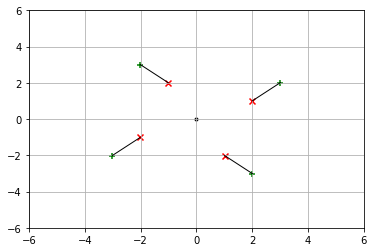

In [42]:
s=[2, 5,3, 5,1 , 5, 2, 5]

abcd=[]
a,b,c,d = logic2xy( s )
abcd.append( [a,b,c,d] )
a,b,c,d = xy2xy_rotate( a,b,c,d )
abcd.append( [a,b,c,d] )
a,b,c,d = xy2xy_rotate( a,b,c,d )
abcd.append( [a,b,c,d] )
a,b,c,d = xy2xy_rotate( a,b,c,d )
abcd.append( [a,b,c,d] )

fig = plt.figure()
ax = fig.add_subplot(111)

for i in range( len(abcd) ):
    t_x = abcd[i][0]
    t_y = abcd[i][1]
    o_x = abcd[i][2]
    o_y = abcd[i][3]
    ax.scatter( t_x, t_y, color='green', marker='+')#plot points
    ax.scatter( o_x, o_y, color='red', marker='x')#plot points
    ax.plot( [t_x, o_x], [t_y, o_y], color='black', linewidth=1)#plot lines

ax.scatter( 0, 0, color='black', marker='.')#plot points


ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
plt.grid(True)
plt.show()
reward_keep=[0]

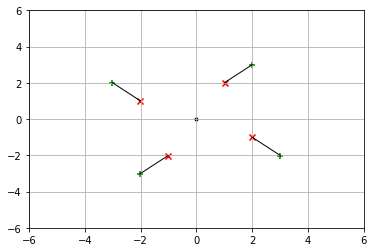

In [43]:
abcd = []

a,b,c,d = xy2xy_mirror( a,b,c,d )
abcd.append( [a,b,c,d] )
a,b,c,d = xy2xy_rotate( a,b,c,d )
abcd.append( [a,b,c,d] )
a,b,c,d = xy2xy_rotate( a,b,c,d )
abcd.append( [a,b,c,d] )
a,b,c,d = xy2xy_rotate( a,b,c,d )
abcd.append( [a,b,c,d] )

fig = plt.figure()
ax = fig.add_subplot(111)

for i in range( len(abcd) ):
    t_x = abcd[i][0]
    t_y = abcd[i][1]
    o_x = abcd[i][2]
    o_y = abcd[i][3]
    ax.scatter( t_x, t_y, color='green', marker='+')#plot points
    ax.scatter( o_x, o_y, color='red', marker='x')#plot points
    ax.plot( [t_x, o_x], [t_y, o_y], color='black', linewidth=1)#plot lines

ax.scatter( 0, 0, color='black', marker='.')#plot points


ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
plt.grid(True)
plt.show()
reward_keep=[0]

In [28]:
def logic2xy( s ):
    s=np.array(s)+0.01

    if s[0]<5:
        t_y = s[0]
    if s[1]<5:
        t_y = -s[1]
    if s[2]<5:
        t_x = s[2]
    if s[3]<5:
        t_x = -s[3]        

    if s[4]<5:
        o_y = s[4]
    if s[5]<5:
        o_y = -s[5]
    if s[6]<5:
        o_x = s[6]
    if s[7]<5:
        o_x = -s[7] 

    return t_x, t_y, o_x, o_y

def xy2xy_mirror( t_x, t_y, o_x, o_y ):
    a = [t_x, t_y, o_x, o_y]
    t_x=a[1]
    t_y=a[0]
    o_x=a[3]
    o_y=a[2]
    return t_x, t_y, o_x, o_y

def xy2xy_rotate( t_x, t_y, o_x, o_y ): # anti clockwise
    a = [t_x, t_y, o_x, o_y]
    t_x = -a[1]
    t_y=a[0]
    o_x = -a[3]
    o_y=a[2]

    return t_x, t_y, o_x, o_y

def xy2logic( t_x, t_y, o_x, o_y ):
    s=[5,5,5,5,   5,5,5,5]
    if t_y>0:
        s[0]=int(around(t_y-0.01))
    if t_y<0:
        s[1]=int(around(-t_y-0.01))
    if t_x>0:
        s[2]=int(around(t_x-0.01))
    if t_x<0:
        s[3]=int(around(-t_x-0.01))

    if o_y>0:
        s[4]=int(around(o_y-0.01))
    if o_y<0:
        s[5]=int(around(-o_y-0.01))
    if o_x>0:
        s[6]=int(around(o_x-0.01))
    if o_x<0:
        s[7]=int(around(-o_x-0.01))

    return s


    # [0, 5, 3, 5, 5, 0, 1, 5]

def logic_action_2( s, act ):
    e = s
    action = act

    logic_q[ e[0], e[1], e[2], e[3], e[4], e[5], e[6],  e[7],    action+1 ] = 1001.

    a,b,c,d=logic2xy(s)
    # rotate 1
    print a,b,c,d
    a,b,c,d = xy2xy_rotate( a,b,c,d )
    print a,b,c,d
    e = xy2logic(a,b,c,d)

    if action == 0:
        action = 3
    elif action == 3:
        action = 1
    elif action == 1:
        action = 2
    elif action == 2:
        action = 0
    print "e: ", e
    logic_q[ e[0], e[1], e[2], e[3], e[4], e[5], e[6],  e[7],    action+1 ] = 1001.
    # rotate 2
    a,b,c,d = xy2xy_rotate( a,b,c,d )
    e = xy2logic(a,b,c,d)

    if action == 0:
        action = 3
    elif action == 3:
        action = 1
    elif action == 1:
        action = 2
    elif action == 2:
        action = 0
    logic_q[ e[0], e[1], e[2], e[3], e[4], e[5], e[6],  e[7],    action+1 ] = 1001.
    # rotate 3
    a,b,c,d = xy2xy_rotate( a,b,c,d )
    e = xy2logic(a,b,c,d)

    if action == 0:
        action = 3
    elif action == 3:
        action = 1
    elif action == 1:
        action = 2
    elif action == 2:
        action = 0
    logic_q[ e[0], e[1], e[2], e[3], e[4], e[5], e[6],  e[7],    action+1 ] = 1001.

    # Mirror
    action = act

    a,b,c,d=logic2xy(s)




    a,b,c,d = xy2xy_mirror( a,b,c,d )
    e = xy2logic(a,b,c,d)

    if action == 0:
        action = 2
    elif action == 3:
        action = 1
    elif action == 1:
        action = 3
    elif action == 2:
        action = 0
    logic_q[ e[0], e[1], e[2], e[3], e[4], e[5], e[6],  e[7],    action+1 ] = 1001.





    # rotate 1
    a,b,c,d = xy2xy_rotate( a,b,c,d )
    e = xy2logic(a,b,c,d)

    if action == 0:
        action = 3
    elif action == 3:
        action = 1
    elif action == 1:
        action = 2
    elif action == 2:
        action = 0
    logic_q[ e[0], e[1], e[2], e[3], e[4], e[5], e[6],  e[7],    action+1 ] = 1001.
    # rotate 2
    a,b,c,d = xy2xy_rotate( a,b,c,d )
    e = xy2logic(a,b,c,d)

    if action == 0:
        action = 3
    elif action == 3:
        action = 1
    elif action == 1:
        action = 2
    elif action == 2:
        action = 0
    logic_q[ e[0], e[1], e[2], e[3], e[4], e[5], e[6],  e[7],    action+1 ] = 1001.
    # rotate 3
    a,b,c,d = xy2xy_rotate( a,b,c,d )
    e = xy2logic(a,b,c,d)

    if action == 0:
        action = 3
    elif action == 3:
        action = 1
    elif action == 1:
        action = 2
    elif action == 2:
        action = 0
    logic_q[ e[0], e[1], e[2], e[3], e[4], e[5], e[6],  e[7],    action+1 ] = 1001.   

In [46]:
import re

re_find=[]

fh = open('ga-evolution.txt')
for  line in  fh.readlines(): 
    searchObj = re.search( r'\>\>\:  \d+ (\d+) (\d+) \[(.*?)', line, re.M|re.I)
    
    

    if searchObj: 
        print searchObj.group(0)
        re_find.append( [ int(searchObj.group(1)), int(searchObj.group(2)) ] )
#         a = searchObj.group(1)
#         b=a.split( ',' )
#         c=[]
#         for i in b:
#             c.append( int( i ) )
#         re_find.append( c )

>>:  0 22 11 [
>>:  1 38 79 [
>>:  2 18 82 [
>>:  3 23 175 [
>>:  4 142 101 [
>>:  5 26 83 [
>>:  6 22 165 [
>>:  7 28 4 [
>>:  8 155 68 [
>>:  9 26 10 [
>>:  10 20 167 [
>>:  11 21 76 [
>>:  12 29 8 [
>>:  13 14 95 [
>>:  14 162 96 [
>>:  15 28 79 [
>>:  16 174 115 [
>>:  17 22 163 [
>>:  18 172 85 [
>>:  19 19 163 [
>>:  20 193 60 [
>>:  21 35 13 [
>>:  22 27 8 [
>>:  23 31 7 [
>>:  24 31 5 [
>>:  25 28 85 [
>>:  26 180 92 [
>>:  27 19 7 [
>>:  28 26 104 [
>>:  29 30 78 [
>>:  30 157 77 [
>>:  31 159 94 [
>>:  32 26 82 [
>>:  33 28 90 [
>>:  34 42 8 [
>>:  35 32 50 [
>>:  36 162 71 [
>>:  37 29 84 [
>>:  38 179 95 [
>>:  39 21 103 [
>>:  40 37 4 [
>>:  41 19 10 [
>>:  42 25 3 [
>>:  43 31 6 [
>>:  44 23 110 [
>>:  45 25 169 [
>>:  46 20 131 [
>>:  47 164 82 [
>>:  48 20 127 [
>>:  49 38 185 [
>>:  50 29 16 [
>>:  51 25 7 [
>>:  52 18 11 [
>>:  53 24 11 [
>>:  54 20 8 [
>>:  55 26 19 [
>>:  56 24 18 [
>>:  57 23 6 [
>>:  58 25 14 [
>>:  59 27 23 [
>>:  60 20 14 [
>>:  61 37 25 [
>>:  

In [50]:
a=np.array( re_find )
a=np.sum(a, axis=1)

In [55]:
b=1000-a

In [70]:
c=[]
d=[]
e=[]
for i in range(10):
    c.append( np.mean( b[0+50*i:50+50*i] ) )
    d.append( np.max( b[0+50*i:50+50*i] ) )
    e.append( np.min( b[0+50*i:50+50*i] ) )

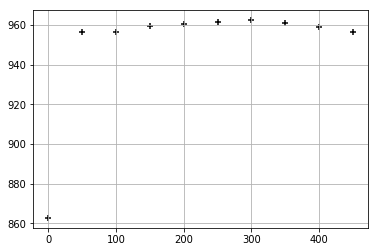

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter( range(0,500,50), c, color='black', marker='+')#plot points
# ax.scatter( range(0,500,50), d, color='red', marker='v')#plot points
# ax.scatter( range(0,500,50), e, color='blue', marker='^')#plot points

# ax.set_xlim(-100, 500)
# ax.set_ylim(850, 1000)
plt.grid(True)
plt.show()
reward_keep=[0]